In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [69]:
df=pd.read_csv("Google_Stock_Price_Train.csv")

In [70]:
df.head()

,Date,Open,High,Low,Close,Volume
0,01/03/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,01/04/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,01/05/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,01/06/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,01/09/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [71]:
df.describe()

,Open,High,Low
count,1509.000000,1509.000000,1509.000000
mean,598.150026,602.587780,593.266736
std,202.607234,203.793158,201.418625
min,279.120000,281.210000,277.220000
25%,436.860000,438.780000,434.180000
50%,563.710000,568.930000,558.470000
75%,752.920000,758.130000,746.060000
max,1075.199951,1078.489990,1063.550049


In [72]:
df.columns


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [73]:
df.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close      object
Volume     object
dtype: object

In [74]:
df['Close']=df['Close'].astype(str).str.replace(',', '')
df['Close']=df['Close'].astype(float)
data=df['Close'].values.reshape(-1,1)
data

array([[ 663.59    ],
       [ 666.45    ],
       [ 657.21    ],
       ...,
       [1049.369995],
       [1048.140015],
       [1046.400024]])

In [75]:
df.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume     object
dtype: object

In [76]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
data=sc.fit_transform(data)

In [77]:
train=data[: int(0.8*len(data))]
test=data[int(0.8*len(data)) :]
train

array([[0.23757287],
       [0.24151427],
       [0.22878051],
       ...,
       [0.39597315],
       [0.39794386],
       [0.41902898]])

In [78]:
def dataSeq(arr,step=3):
    x=[]
    y=[]
    for i in range(len(arr)-step):
        x.append(arr[i:i+step,0])
        y.append(arr[i+step,0])
    return np.array(x),np.array(y)

In [79]:
X_train,Y_train=dataSeq(train)
X_test,Y_test=dataSeq(test)

In [80]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM

model=Sequential()
model.add(keras.layers.LSTM(units=25,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(keras.layers.LSTM(units=25))
model.add(keras.layers.Dense(units=1))

In [81]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 3, 25)             2700      
                                                                 
 lstm_5 (LSTM)               (None, 25)                5100      
                                                                 
 dense_2 (Dense)             (None, 1)                 26        
                                                                 
Total params: 7,826
Trainable params: 7,826
Non-trainable params: 0
_________________________________________________________________


In [82]:
model.compile(optimizer="Adam",loss="mse")

In [83]:
model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=25,batch_size=20)

Epoch 1/25
61/61 [==============================] - 5s 19ms/step - loss: 0.0648 - val_loss: 0.0215
Epoch 2/25
61/61 [==============================] - 0s 6ms/step - loss: 0.0074 - val_loss: 0.0027
Epoch 3/25
61/61 [==============================] - 0s 6ms/step - loss: 0.0021 - val_loss: 0.0011
Epoch 4/25
61/61 [==============================] - 0s 6ms/step - loss: 0.0019 - val_loss: 6.4685e-04
Epoch 5/25
61/61 [==============================] - 0s 6ms/step - loss: 0.0018 - val_loss: 6.4999e-04
Epoch 6/25
61/61 [==============================] - 0s 6ms/step - loss: 0.0017 - val_loss: 4.8832e-04
Epoch 7/25
61/61 [==============================] - 0s 6ms/step - loss: 0.0017 - val_loss: 3.9633e-04
Epoch 8/25
61/61 [==============================] - 0s 6ms/step - loss: 0.0017 - val_loss: 3.6881e-04
Epoch 9/25
61/61 [==============================] - 0s 6ms/step - loss: 0.0015 - val_loss: 0.0019
Epoch 10/25
61/61 [==============================] - 0s 7ms/step - loss: 0.0018 - val_loss: 4.178

In [84]:
y_pred=model.predict(X_test)

10/10 [==============================] - 1s 4ms/step


In [85]:
y_pred=sc.inverse_transform(y_pred)

In [86]:
Y_test=sc.inverse_transform(Y_test.reshape(-1,1))

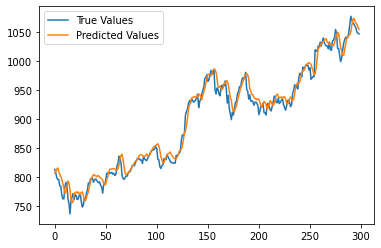

In [87]:
import matplotlib.pyplot as plt
plt.plot(Y_test, label='True Values')
plt.plot(y_pred, label='Predicted Values')
plt.legend()
plt.show()

In [88]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(Y_test, y_pred)
mse = mean_squared_error(Y_test, y_pred)
print('MAE: ', mae)
print('MSE: ', mse)


MAE:  10.315219418752609
MSE:  180.5993257103488
